In [48]:
import kaggle, numpy as np

In [49]:
from pathlib import Path

dataset_name = 'titanic'
path = Path('./data')/dataset_name
path

PosixPath('data/titanic')

In [50]:
import shutil

if not path.exists():
  path.mkdir(parents=True)
  kaggle.api.competition_download_cli(dataset_name, path=path)
  shutil.unpack_archive(str(path/f'{dataset_name}.zip'), str(path))

In [51]:
[x for x in path.glob('**/*') if x.is_file()]

[PosixPath('data/titanic/test.csv'),
 PosixPath('data/titanic/titanic.zip'),
 PosixPath('data/titanic/train.csv'),
 PosixPath('data/titanic/gender_submission.csv')]

In [52]:
import pandas as pd

df = pd.read_csv(path/'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [55]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
df.mode().loc[0]

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [57]:
df.fillna(df.mode().iloc[0], inplace=True)

In [58]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [59]:
df.shape

(891, 12)

In [60]:
pd.Categorical(df.Sex)

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'female', 'male', 'male']
Length: 891
Categories (2, object): ['female', 'male']

In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
conts = ['Age', 'SibSp', 'Fare', 'Pclass', 'Parch']
cats = ['Sex', 'Embarked']
dep = 'Survived'

In [63]:
def process(df):
  df['Embarked'] = pd.Categorical(df.Embarked)
  df['Sex'] = pd.Categorical(df.Sex)
  
process(df)

In [64]:
df.Sex.cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [65]:

from sklearn.model_selection import train_test_split
from numpy import random

random.seed(42)
trn_df, val_df = train_test_split(df, test_size=.25)
trn_df[cats] = trn_df[cats].apply(lambda r: r.cat.codes)
val_df[cats] = val_df[cats].apply(lambda r: r.cat.codes)

In [66]:
def xs_y(df):
  xs = df[cats + conts].copy()
  return xs, df[dep] if dep in df else None

trn_x, trn_y = xs_y(trn_df)
val_x, val_y = xs_y(val_df)

In [67]:
preds = trn_x.Sex == 0

In [68]:
abs(preds-trn_y).mean()

0.2125748502994012

In [69]:
side = trn_x[trn_x.Sex >= 0.5]
side

,Sex,Embarked,Age,SibSp,Fare,Pclass,Parch
298,1,2,24.00,0,30.5000,1,0
884,1,2,25.00,0,7.0500,3,0
478,1,2,22.00,0,7.5208,3,0
305,1,2,0.92,1,151.5500,1,2
405,1,2,34.00,1,21.0000,2,0
...,...,...,...,...,...,...,...
614,1,2,35.00,0,8.0500,3,0
20,1,2,35.00,0,26.0000,2,0
270,1,2,24.00,0,31.0000,1,0
860,1,2,41.00,2,14.1083,3,0


In [70]:
trn_y[trn_x.Sex <= 0.5].std()

0.4382937743350381

In [71]:
age_uniq = trn_x.Age.unique()
age_uniq.sort()
age_uniq

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 21.  ,
       22.  , 23.  , 24.  , 24.5 , 25.  , 26.  , 27.  , 28.  , 28.5 ,
       29.  , 30.  , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 , 35.  ,
       36.  , 36.5 , 37.  , 38.  , 39.  , 40.  , 40.5 , 41.  , 42.  ,
       43.  , 44.  , 45.  , 45.5 , 46.  , 47.  , 48.  , 49.  , 50.  ,
       51.  , 52.  , 53.  , 54.  , 55.  , 55.5 , 56.  , 57.  , 58.  ,
       59.  , 60.  , 61.  , 62.  , 64.  , 65.  , 70.  , 70.5 , 74.  ,
       80.  ])

In [72]:
def side_score(side, y):
  tot = side.sum()
  if tot <= 1: return 0
  return y[side].std()*tot

def split_score(col, y, cutoff):
  lhs = col <= cutoff
  return (side_score(lhs, y) + side_score(~lhs, y))/len(y)

In [73]:
split_score(trn_x.Sex, trn_y, 0.5)

0.4078753098206398

In [74]:
scores = np.array([split_score(trn_x.Age, trn_y, cutoff=cutoff) for cutoff in age_uniq])
age_uniq[scores.argmin()]

6.0

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_x, trn_y)

In [76]:
import graphviz, re

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

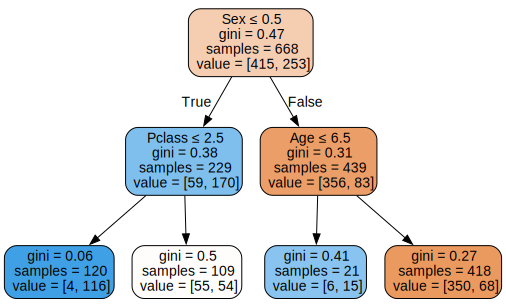

In [77]:
draw_tree(m, trn_x)

<AxesSubplot:ylabel='col'>

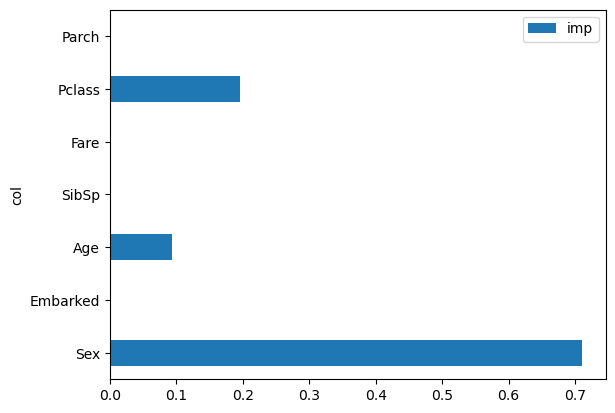

In [84]:
pd.DataFrame(dict(col=trn_x.columns, imp=m.feature_importances_)).plot.barh('col', 'imp')